In [147]:
!conda env list

# conda environments:
#
base                     /home/yangshanghui/anaconda3
pytorch_dev              /home/yangshanghui/anaconda3/envs/pytorch_dev
taac                  *  /home/yangshanghui/anaconda3/envs/taac



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
train_root = "../dataset/train/"
train_user_path = os.path.join(train_root, "user.csv")
train_ad_path = os.path.join(train_root, "ad.csv")
train_click_path = os.path.join(train_root, "click_log.csv")

test_root = "../dataset/test/"
test_ad_path = os.path.join(test_root, "ad.csv")
test_click_path = os.path.join(test_root, "click_log.csv")

In [4]:
train_ad = pd.read_csv(train_ad_path, na_values="\\N")
train_click = pd.read_csv(train_click_path, na_values="\\N")
train_user = pd.read_csv(train_user_path, na_values="\\N")

test_ad = pd.read_csv(test_ad_path, na_values="\\N")
test_click = pd.read_csv(test_click_path, na_values="\\N")

## train data
* train_user的数量：603, 000
* train_record的数量：20,151,356

## valid data
* valid_user的数量：297, 000
* valid_record的数量：9,931,415

## test_data
* test_user的数量：1,000,000
* test_click的数量：33,585,512

In [152]:
train_user, valid_user = train_test_split(train_user, test_size=0.33, random_state=42)

In [153]:
def get_part_click(total_click, list_user_id, on="user_id"):
    part_record = pd.merge(total_click, list_user_id, on=on)
    return part_record

train_record = get_part_click(train_click, train_user)
valid_record = get_part_click(train_click, valid_user)

In [154]:
u_tuser = train_record.user_id.unique()
u_vuser = valid_record.user_id.unique()
np.intersect1d(u_tuser, u_vuser)

array([], dtype=int64)

In [155]:
train_record.head()
valid_record.head()

,time,user_id,creative_id,click_times,age,gender
0,6,309204,325532,1,6,1
1,59,309204,2746730,1,6,1
2,12,309204,726402,1,6,1
3,79,309204,2851451,1,6,1
4,32,309204,1569716,1,6,1


,time,user_id,creative_id,click_times,age,gender
0,9,30920,567330,1,2,1
1,65,30920,3072255,1,2,1
2,56,30920,2361327,1,2,1
3,81,30920,3879497,1,2,1
4,80,30920,3751623,1,2,1


In [156]:
train_record.groupby("time").count()
valid_record.groupby("time").count()

,user_id,creative_id,click_times,age,gender
time,,,,,
1,199151,199151,199151,199151,199151
2,190983,190983,190983,190983,190983
3,182697,182697,182697,182697,182697
4,181896,181896,181896,181896,181896
5,179339,179339,179339,179339,179339
...,...,...,...,...,...
87,225079,225079,225079,225079,225079
88,233589,233589,233589,233589,233589
89,215386,215386,215386,215386,215386


,user_id,creative_id,click_times,age,gender
time,,,,,
1,98956,98956,98956,98956,98956
2,93231,93231,93231,93231,93231
3,90939,90939,90939,90939,90939
4,89489,89489,89489,89489,89489
5,88703,88703,88703,88703,88703
...,...,...,...,...,...
87,111367,111367,111367,111367,111367
88,115441,115441,115441,115441,115441
89,106500,106500,106500,106500,106500


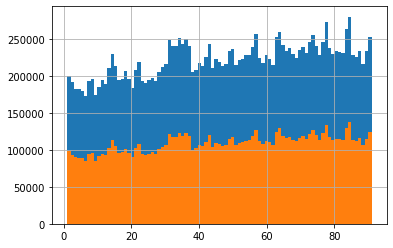

In [157]:
train_record.time.hist(bins=91)
valid_record.time.hist(bins=91)

In [158]:
train_record.count()[0]
valid_record.count()[0]
test_click.count()[0]
len(test_click["user_id"].unique())

20151356

9931415

33585512

1000000

In [159]:
user_dict = dict(list(train_record.groupby("user_id")))

In [164]:
for k, v in user_dict.items():
#     print(v)
    print(type(v))
    break

<class 'pandas.core.frame.DataFrame'>


## 关于ad information

> train_ad的industry都是整数
> 
> 只有product_id 和 industry有NaN值


**以下都是unique number**
### 1. creative_id
* train creative_id number: 2,481,135
* test creative_id number: 2,618,159
* two intersection number: 1,686,522
---
### 2. ad_id
* train ad_id number: 2,264,190
* test ad_id number: 2,379,475
* two intersection number: 1,616,305
---
### 3. product_id
* train product_id number: 33,273
* test product_id number: 34,111
* two intersection number: 28,326
---
### 4. product_category
* train product_category number: 18
* test product_category number: 18
* two intersection number: 18
---
### 5. advertiser_id
* train advertiser_id number: 52,090
* test advertiser_id number: 52,861
* two intersection number: 47,081
---
### 6. industry
* train industry number: 326
* test industry number: 326
* two intersection number: 319
---

In [190]:
train_ad.head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,NaN,5,381,78.0
1,4,4,NaN,5,108,202.0
2,7,7,NaN,5,148,297.0
3,8,8,NaN,5,713,213.0
4,9,9,NaN,5,695,213.0


In [198]:
def explore_tr_te_ad(column_name):
    print("### {}".format(column_name))
    a = train_ad[column_name].unique().shape
    b = test_ad[column_name].unique().shape
    c = np.intersect1d(train_ad[column_name].unique(), test_ad[column_name].unique()).shape
    print("* train {} number: {}\n* test {} number: {}\n* two intersection number: {}".format(column_name, a[0], column_name, b[0], c[0]))
    print("---")

explore_tr_te_ad("creative_id")
explore_tr_te_ad("ad_id")
explore_tr_te_ad("product_id")
explore_tr_te_ad("product_category")
explore_tr_te_ad("advertiser_id")
explore_tr_te_ad("industry")

### creative_id
* train creative_id number: 2481135
* test creative_id number: 2618159
* two intersection number: 1686522
---
### ad_id
* train ad_id number: 2264190
* test ad_id number: 2379475
* two intersection number: 1616305
---
### product_id
* train product_id number: 33273
* test product_id number: 34111
* two intersection number: 28326
---
### product_category
* train product_category number: 18
* test product_category number: 18
* two intersection number: 18
---
### advertiser_id
* train advertiser_id number: 52090
* test advertiser_id number: 52861
* two intersection number: 47081
---
### industry
* train industry number: 326
* test industry number: 326
* two intersection number: 319
---


In [225]:
'''
v.sort_values(by="time").head()
v.sort_values(by="time").groupby("creative_id", as_index=False).agg({"click_times": "count"})
v.sort_values(by="time").groupby("creative_id").agg({"click_times": "count"})
'''
# TODO 对每个用户建立时间序列特征
def create_time_feature_to_one(one_record):
    pass
#     one_record.sort()
    

create_time_feature_to_one(v)

'\nv.sort_values(by="time").head()\nv.sort_values(by="time").groupby("creative_id", as_index=False).agg({"click_times": "count"})\nv.sort_values(by="time").groupby("creative_id").agg({"click_times": "count"})\n'

In [233]:
def get_adinform(creative_id, data_ad):
    ad_inform = data_ad[data_ad["creative_id"] == creative_id]
    print(ad_inform.astype(int))

get_adinform(325532, train_ad)

        creative_id   ad_id  product_id  product_category  advertiser_id  \
201114       325532  292523       27081                 3          32066   

        industry  
201114       242  


In [224]:
train_record.head()
valid_record.head()
test_click.head()

,time,user_id,creative_id,click_times,age,gender
0,6,309204,325532,1,6,1
1,59,309204,2746730,1,6,1
2,12,309204,726402,1,6,1
3,79,309204,2851451,1,6,1
4,32,309204,1569716,1,6,1


,time,user_id,creative_id,click_times,age,gender
0,9,30920,567330,1,2,1
1,65,30920,3072255,1,2,1
2,56,30920,2361327,1,2,1
3,81,30920,3879497,1,2,1
4,80,30920,3751623,1,2,1


,time,user_id,creative_id,click_times
0,20,3131989,645764,1
1,20,3131989,1027422,1
2,20,3131989,1106443,1
3,20,3131989,629802,1
4,59,3131989,2839769,1


In [7]:
test_record = pd.merge(test_click, test_ad, on="creative_id")

In [8]:
test_record

,time,user_id,creative_id,click_times,ad_id,product_id,product_category,advertiser_id,industry
0,20,3131989,645764,1,573314,58.0,2,14689,6.0
1,10,3142948,645764,1,573314,58.0,2,14689,6.0
2,14,3170643,645764,1,573314,58.0,2,14689,6.0
3,10,3194257,645764,1,573314,58.0,2,14689,6.0
4,21,3222925,645764,1,573314,58.0,2,14689,6.0
...,...,...,...,...,...,...,...,...,...
33585507,49,3131983,2033604,1,1757820,NaN,5,29292,109.0
33585508,4,3131984,187695,1,168395,1634.0,2,14494,322.0
33585509,5,3131984,322785,1,290114,2031.0,2,19976,238.0
33585510,16,3131984,900585,1,793805,1766.0,2,33097,319.0
